# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python
Alunas: Suelen Silva Oliveira, Vitoria Borges Bulhoes e Yasmin Lieh Sakamoto.

## Indústria de fabricação painéis de MDF
Atividade referente ao capítulo 10.6.3 da AP42, que se refere a Painel de fibra de média densidade. \
https://www.epa.gov/sites/default/files/2020-10/documents/c10s0603.pdf

Fatores de emissão (FE) foram convertidos da seguinte maneira:\
-Caso A: FE em lb/ODT = 0.5 kg/Mg = 0.35 kg/m3 (Densidade do MDF = 700kg/m3)\
-Caso B: FE em lb/MSF 3/4 = 0.26 kg/m3\
-Caso C: FE em lb/MSF = 0.0049 kg/m2 = 0.27 kg/m3 (Espessura do MDF = 0.018m)

Taxa de atividade = 1.140 milhão m3/ano

## 1 - Planilhar em arquivo .csv os fatores de emissão para cada processo do seu empreendimento (linhas) e para cada poluente (colunas).

In [105]:
# Utilizando Pandas para abrir a planilha
import pandas as pd
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)
print(' ')

# Indicando nome do arquivo
chapterNumer = 10
subChapter = 3
subsubChapter = 6
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'_'+str(subsubChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\' + file)
print(fe)

C:\Users\vinicius\Documents\ENS5173_202401\tabelas\FE
 
chp_10_3_6.csv
                       Source      PM  PM-10     NOX      CO  VOC as propane
0                  Tube dryer  3.6400  0.560     NaN  1.4000          2.3500
1                   Hot press  0.0468  0.039  0.0078  0.0088          0.2080
2  Former with blowline blend     NaN    NaN     NaN     NaN          0.0200
3                     Sander      NaN    NaN     NaN     NaN          0.0180
4              Saw and hogger     NaN    NaN     NaN     NaN          0.0354


## 2 - Elaborar uma função para ler a planilha dos fatores de emissão e estimar a emissão com base na taxa de atividade do empreendimento.

                                   PM     PM-10     NOX         CO  \
Source                                                               
Tube dryer                  4149600.0  638400.0     NaN  1596000.0   
Hot press                     53352.0   44460.0  8892.0    10032.0   
Former with blowline blend        NaN       NaN     NaN        NaN   
Sander                            NaN       NaN     NaN        NaN   
Saw and hogger                    NaN       NaN     NaN        NaN   

                            VOC as propane  
Source                                      
Tube dryer                       2679000.0  
Hot press                         237120.0  
Former with blowline blend         22800.0  
Sander                             20520.0  
Saw and hogger                     40356.0  
1
2
3
4
5


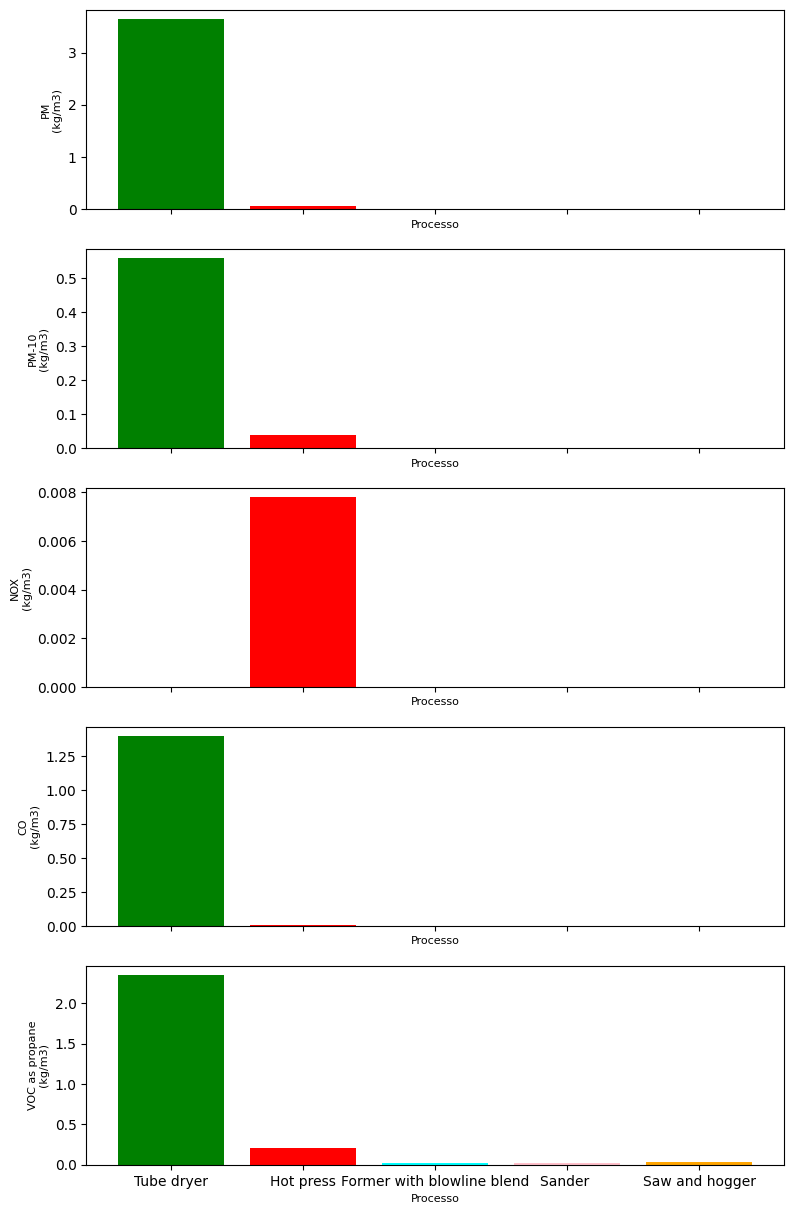

In [106]:
ta = 1140000 # taxa de atividade em m3/ano

def emis(FE, TA):
    emis = pd.DataFrame()
    cols_numericas = FE.select_dtypes(np.float64).columns
    emis = FE[cols_numericas] * TA # multiplica todas as colunas numericas de FE pela TA
    emis = emis.set_index(FE['Source']) # coloca os processos no index 
    return emis

emissoes = emis(fe, ta) # chamando a funcao
print(emissoes) 

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True, figsize=(9, 15))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Source'],fe.iloc[:,ii],color = ['green','red','cyan','pink','orange'])
    ax[ii-1].set_xlabel('Processo', fontsize=8)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/m3)', fontsize=8) 

# Salva a figura na pasta figures - criar a pasta antes!!
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')


O processo do empreendimento que possui maior emissão, como podemos analisar nas figuras acima é o "Tube Dryer" que consiste no Secador de tubo, utilizado para retirar a umidade da madeira.

## 3 - Elaborar uma função para criar uma variabilidade na taxa de atividade do empreendimento, com componentes aleatória e sazonal (com base nas datas do ano de 2023).

In [134]:
import numpy as np
def variabilidade(ta):
    datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='H') # intervalo de datas
    df = pd.DataFrame({'Data': datas}) # DataFrame com as datas
    df['Mes'] = df['Data'].dt.month # nova coluna com os meses no DataFrame
    df['Dia do Ano'] = df['Data'].dt.dayofyear # nova coluna com os dias no DataFrame
    
    sazonalidade = np.cos((2*np.pi)*df['Dia do Ano']/365)+1 # funcao que modela a sazonalidade 
    df['Sazonalidade'] = sazonalidade # variabilidade da TA entre os dias (componente sazonal)
   
    # variabilidade da TA entre os dias (componente aleatoria), metodo de Monte-Carlo:
    # obs: 1ano = 365 dias
    atvMax = ta/365
    atvMin = 1500
    n = df.shape[0] # Extraindo o número de linhas/número de datas
    atv = (atvMax - atvMin) * np.random.rand(n) + atvMin
        
    df['Atividade'] = atv  
    df['AtividadeSazonal'] = df['Atividade'] * df['Sazonalidade'] # Valores aleatórios com sazonalidade 

    return df

dados = variabilidade(ta) # chamando a funcao
dados

C:\Users\vinicius\AppData\Local\Temp\ipykernel_11068\379299544.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='H') # intervalo de datas


,Data,Mes,Dia do Ano,Sazonalidade,Atividade,AtividadeSazonal
0,2023-01-01 00:00:00,1,1,1.999852,1641.120165,3281.997180
1,2023-01-01 01:00:00,1,1,1.999852,2031.670871,4063.040727
2,2023-01-01 02:00:00,1,1,1.999852,3074.830717,6149.205864
3,2023-01-01 03:00:00,1,1,1.999852,1584.388242,3168.541740
4,2023-01-01 04:00:00,1,1,1.999852,2138.646361,4276.975858
...,...,...,...,...,...,...
8732,2023-12-30 20:00:00,12,364,1.999852,1718.069199,3435.883847
8733,2023-12-30 21:00:00,12,364,1.999852,1540.566748,3080.905245
8734,2023-12-30 22:00:00,12,364,1.999852,2202.733731,4405.141104
8735,2023-12-30 23:00:00,12,364,1.999852,2828.017932,5655.616863


## 4 - Plotando o gráfico da componente sazonal

C:\Users\vinicius\AppData\Local\Temp\ipykernel_11068\546006712.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='H') # intervalo de datas


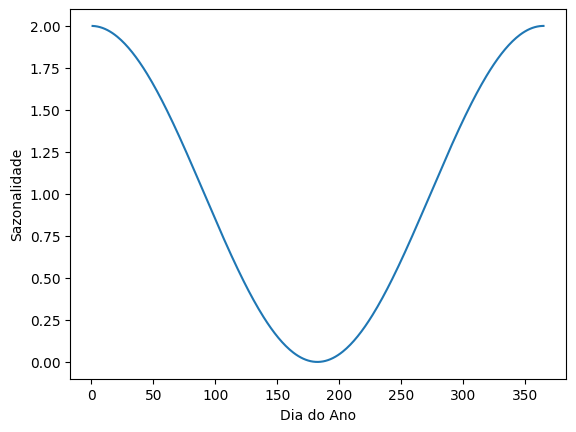

In [129]:
def variabilidade(ta):
    datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='H') # intervalo de datas
    df = pd.DataFrame({'Data': datas}) # DataFrame com as datas
    df['Mes'] = df['Data'].dt.month # nova coluna com os meses no DataFrame
    df['Dia do Ano'] = df['Data'].dt.dayofyear # nova coluna com os dias no DataFrame
    
    sazonalidade = np.cos((2*np.pi)*df['Dia do Ano']/365)+1 # funcao que modela a sazonalidade 
    df['sazonalidade'] = sazonalidade # variabilidade da TA entre os dias (componente sazonal)

    plt.plot(df['Dia do Ano'], sazonalidade)
    plt.xlabel('Dia do Ano')
    plt.ylabel('Sazonalidade')
    plt.show()
    df.to_csv(r"C:\Users\vinicius\Documents\ENS5173_202401\tabelas\FE\ativ.csv")

    return df

dados = variabilidade(ta) # chamando a funcao

## 5 - Plotando o gráfico da componente aleatorio sazonal

C:\Users\vinicius\AppData\Local\Temp\ipykernel_11068\516450513.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='H') # intervalo de datas


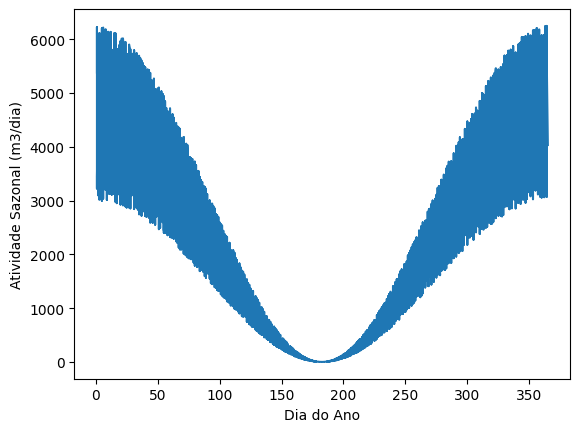

In [136]:
def variabilidade(ta):
    datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='H') # intervalo de datas
    df = pd.DataFrame({'Data': datas}) # DataFrame com as datas
    df['Mes'] = df['Data'].dt.month # nova coluna com os meses no DataFrame
    df['Dia do Ano'] = df['Data'].dt.dayofyear # nova coluna com os dias no DataFrame
    
    sazonalidade = np.cos((2*np.pi)*df['Dia do Ano']/365)+1 # funcao que modela a sazonalidade 
    df['sazonalidade'] = sazonalidade # variabilidade da TA entre os dias (componente sazonal)
   
    # variabilidade da TA entre os dias (componente aleatoria), metodo de Monte-Carlo:
    # obs: 1ano = 365 dias
    atvMax = ta/365
    atvMin = 1500
    n = df.shape[0] # Extraindo o número de linhas/número de datas
    atv = (atvMax - atvMin) * np.random.rand(n) + atvMin
    
    df['atividade'] = atv  
    df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade'] # Valores aleatórios com sazonalidade 
    
    plt.plot(df['Dia do Ano'], df['aleatorioSazonal'])
    plt.xlabel('Dia do Ano')
    plt.ylabel('Atividade Sazonal (m3/dia)')
    plt.show()
    df.to_csv(r"C:\Users\vinicius\Documents\ENS5173_202401\tabelas\FE\ativ.csv")
    
    return df

dados = variabilidade(ta) # chamando a funcao


### Qual a variabilidade temporal da taxa de atividade? estime esta taxa e demonstre a componente sazonal (variabilidade entre meses) e aleatória. Faça figuras e discuta. 
### Qual a soma das emissões considerando todos os processos? qual a emissão média, mínima e máxima (unidades sempre em gramas por segundo - g/s)

## 6 - Soma das emissões considerando todos os processos

In [ ]:
#Qual a soma das emissões considerando todos os processos? qual a emissão média, mínima e máxima (unidades sempre em gramas por segundo - g/s)

